<a href="https://colab.research.google.com/github/naveenchintalapudi/WebTechnologies/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

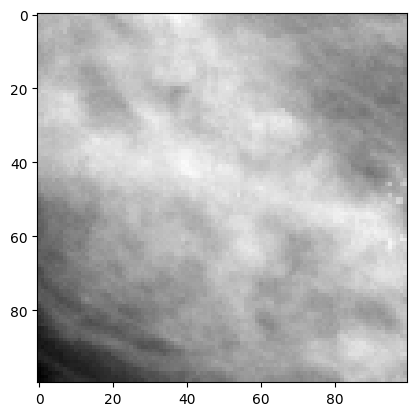

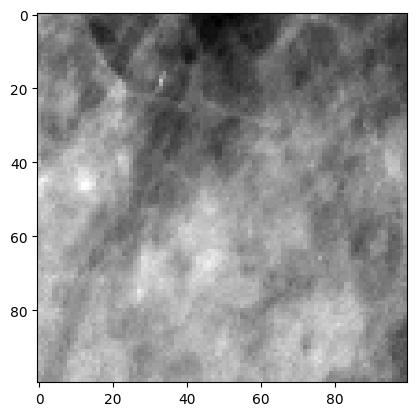

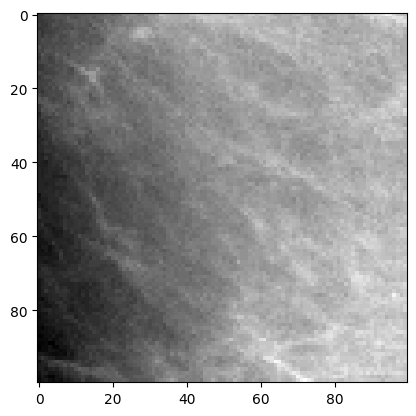

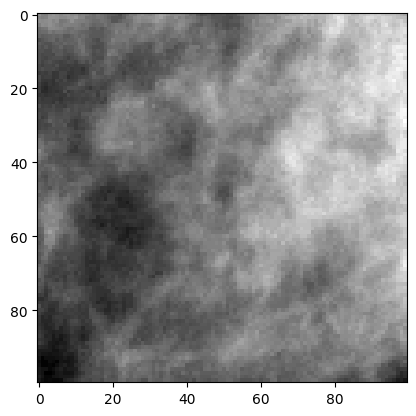

Example 1:
Label: 0, Label_Normal: 0


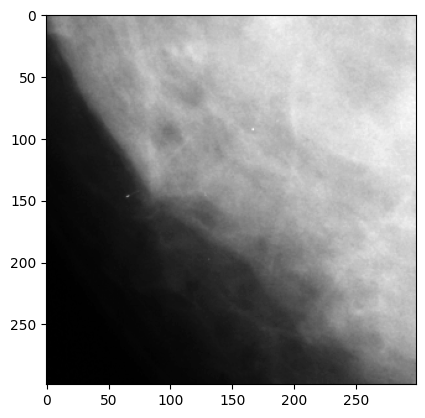

--------------------------------------------------
Example 2:
Label: 0, Label_Normal: 0


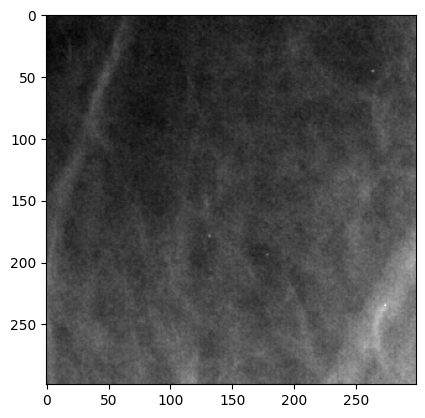

--------------------------------------------------
Example 3:
Label: 0, Label_Normal: 0


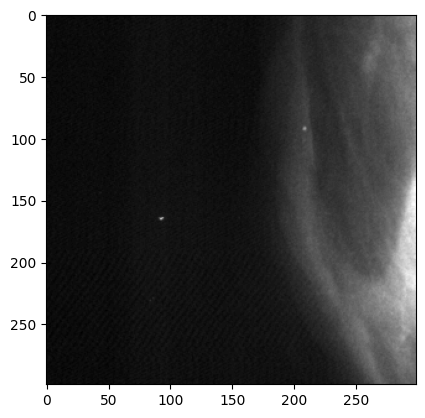

--------------------------------------------------
Example 4:
Label: 4, Label_Normal: 1


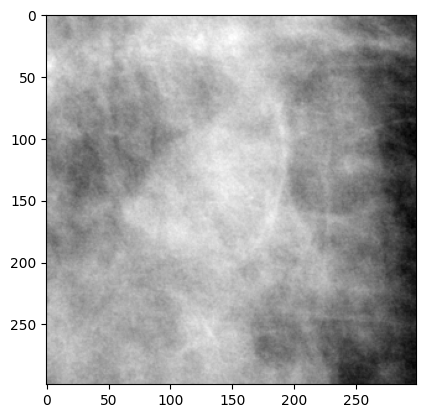

--------------------------------------------------
Example 5:
Label: 0, Label_Normal: 0


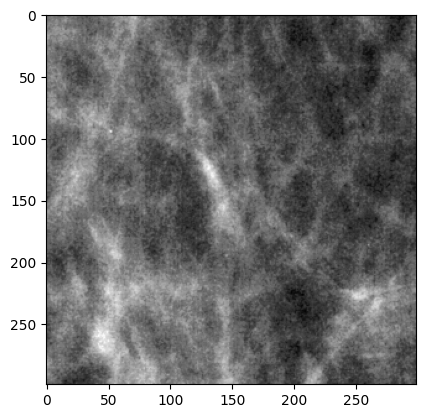

--------------------------------------------------
Example 6:
Label: 0, Label_Normal: 0


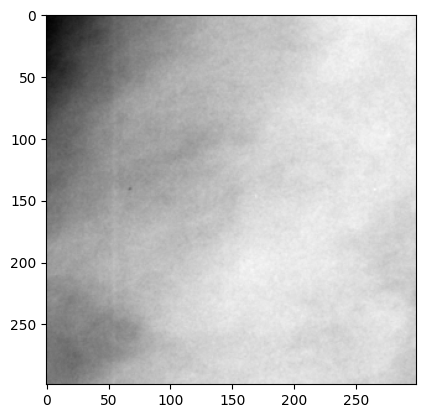

--------------------------------------------------
Example 7:
Label: 4, Label_Normal: 1


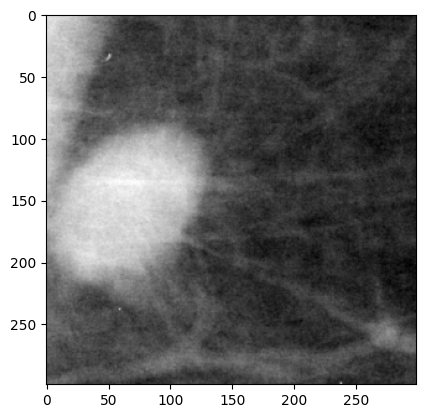

--------------------------------------------------
Example 8:
Label: 0, Label_Normal: 0


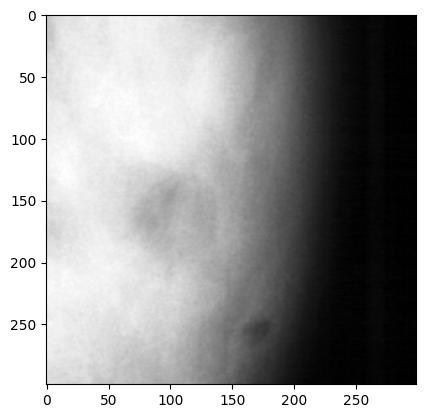

--------------------------------------------------
Example 9:
Label: 2, Label_Normal: 1


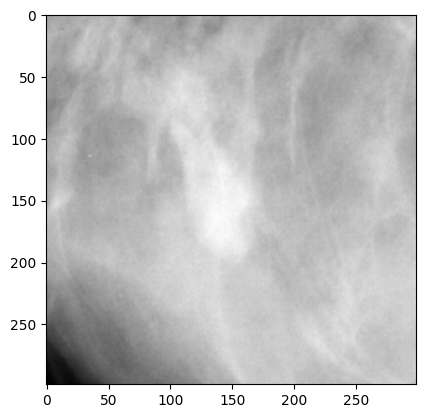

--------------------------------------------------
Example 10:
Label: 0, Label_Normal: 0


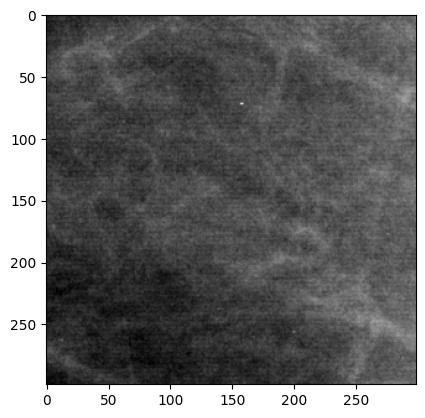

--------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the feature dictionary for parsing TFRecords
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
}

# Function to parse the TFRecord
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_single_example(example, feature_dictionary)
    return parsed_example

# Function to read data from a TFRecord file
def read_data(filename):
    dataset = tf.data.TFRecordDataset(filename, num_parallel_reads=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=31000).cache()
    dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    images = []
    labels = []

    for image_features in dataset:
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299, 1])
        image = cv2.resize(image.numpy(), (100, 100))
        images.append(image)
        labels.append(image_features['label_normal'].numpy())

    return images, labels

# List of TFRecord files
filenames = [
    '/content/drive/MyDrive/DDSM/archive (4)/training10_0/training10_0.tfrecords',
    '/content/drive/MyDrive/DDSM/archive (4)/training10_1/training10_1.tfrecords',
    '/content/drive/MyDrive/DDSM/archive (4)/training10_2/training10_2.tfrecords'
]

all_images = []
all_labels = []

# Read data from each file and accumulate images and labels
for file in filenames:
    images, labels = read_data(file)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert lists to numpy arrays
X = np.array(all_images)
y = np.array(all_labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, shuffle=True, stratify=y)

# Reshape training and test sets
x_train = x_train.reshape(x_train.shape[0], 100, 100, 1)
x_test = x_test.reshape(x_test.shape[0], 100, 100, 1)

# Display the first few images in the training set
for i in range(4):
    plt.imshow(x_train[i].reshape(100, 100), cmap='gray')
    plt.show()

# Function to parse TFRecord for visualization
def parse_tfrecord(example):
    example = tf.io.parse_single_example(example, feature_dictionary)
    image = tf.io.decode_raw(example['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    image = tf.cast(image, tf.float32) / 255.0
    label = example['label']
    label_normal = example['label_normal']
    return image, label, label_normal

# Create a dataset for visualization
raw_dataset = tf.data.TFRecordDataset(filenames)
dataset = raw_dataset.map(parse_tfrecord)

# Display a few examples from the dataset
for i, (image, label, label_normal) in enumerate(dataset.take(10)):
    print(f"Example {i + 1}:")
    print(f"Label: {label.numpy()}, Label_Normal: {label_normal.numpy()}")
    plt.imshow(image.numpy().reshape(299, 299), cmap='gray')
    plt.show()
    print("--------------------------------------------------")

# Dictionary to store class labels
class_labels = {
    0: 'Negative',
    1: 'Benign Calcification',
    2: 'Benign Mass',
    3: 'Malignant Calcification',
    4: 'Malignant Mass'
}

# Dictionary to store images of each class
class_images = {label: [] for label in class_labels.values()}

# Collect images for each class
for image, label, label_normal in dataset:
    class_name = class_labels[label.numpy()]
    class_images[class_name].append(image.numpy())

# Display examples of each class
for class_name, images in class_images.items():
    print(f"Class: {class_name}")
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 4)):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].reshape(299, 299), cmap='gray')
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.show()
